In [1]:
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cmcrameri import cm


In [2]:
PROJECTION = ccrs.PlateCarree()


def prep_axes(ax, extents=[-125, -65, 22, 58], grid=False):
    ax.set_extent(extents, crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE.with_scale("50m"), edgecolor="gray", zorder=2)
    ax.spines[:].set_color("gray")
    if grid:
        gl = ax.gridlines(
            crs=PROJECTION,
            linewidth=0.8,
            color="gray",
            alpha=0.5,
            linestyle="--",
            draw_labels=True,
            zorder=0,
        )
        gl.top_labels = False
        gl.bottom_labels = True
        gl.left_labels = True
        gl.right_labels = False
        gl.xlines = True
        gl.ylines = True
        gl.ylocator = mticker.FixedLocator([30, 40, 50])
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return ax


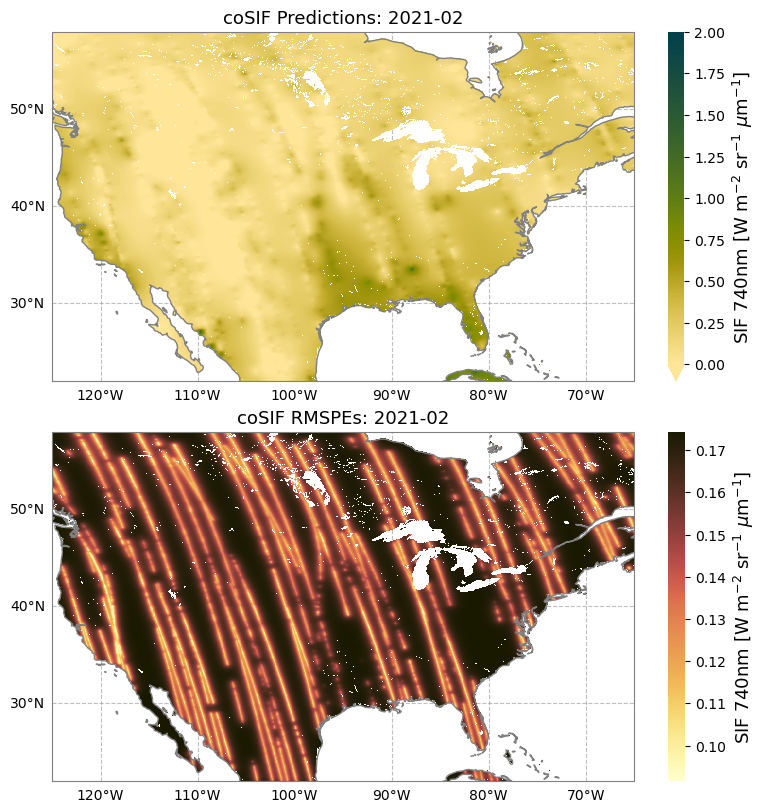

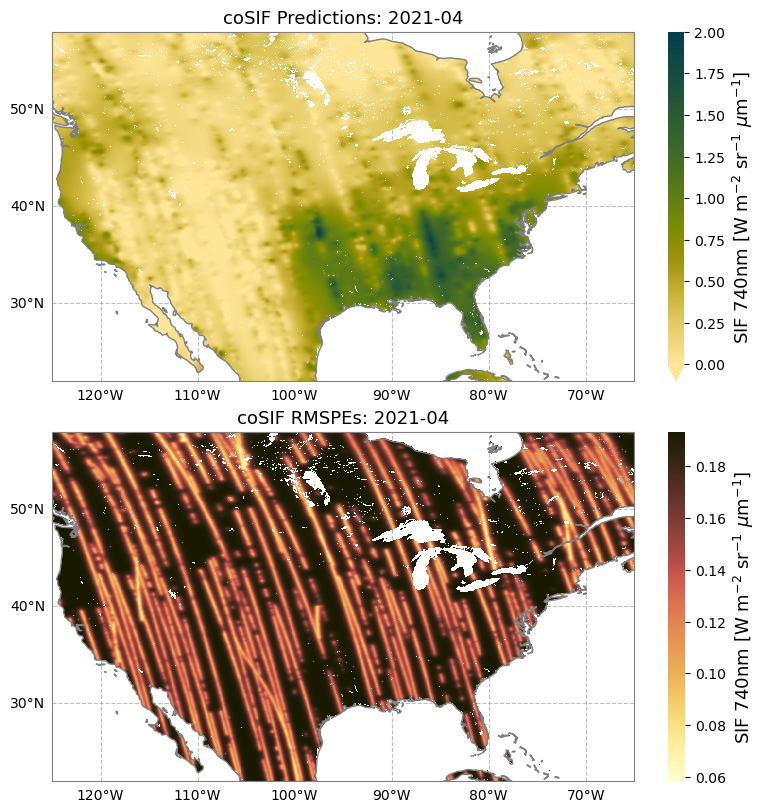

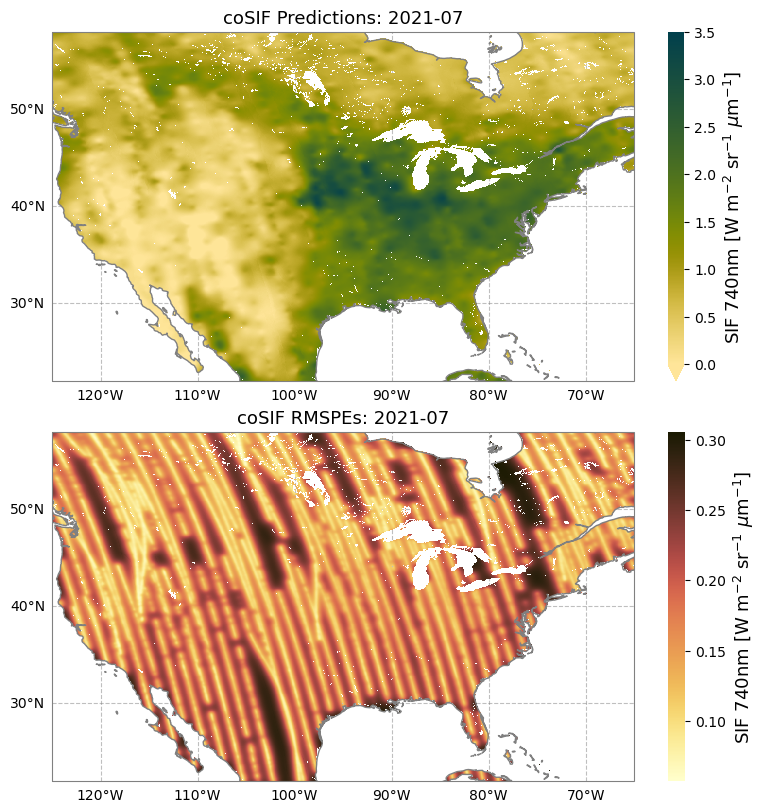

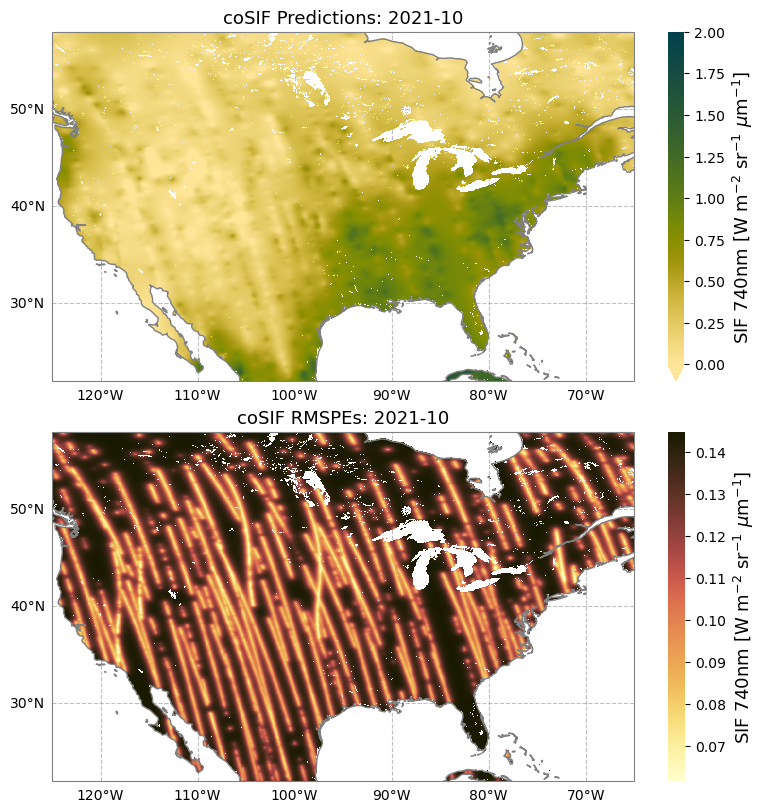

In [3]:
extents = [-125, -65, 22, 58]
SIF_UNITS = "740nm [W m$^{-2}$ sr$^{-1}$ $\mu$m$^{-1}$]"
months = {"202102": "2021-02", "202104": "2021-04", "202107": "2021-07", "202110": "2021-10"}

for label, month in months.items():

    ds_cosif = xr.open_dataset(f"../data/output/coSIF_{label}.nc4")

    fig, axes = plt.subplots(
        2, 1, figsize=(8, 8), subplot_kw={"projection": PROJECTION}, constrained_layout=True
    )

    if label == "202107":
        upper_bound = 3.5
    else:
        upper_bound = 2

    prep_axes(axes[0], extents=extents, grid=True)
    field_prediction = xr.plot.imshow(
        darray=ds_cosif.squeeze()["cosif_prediction"],
        zorder=1,
        transform=ccrs.PlateCarree(),
        ax=axes[0],
        cmap=cm.bamako_r,
        vmin=0,
        vmax=upper_bound,
        add_colorbar=False,
        add_labels=False,
    )
    axes[0].set_title(f"coSIF Predictions: {month}", fontsize=13)
    cb1 = fig.colorbar(field_prediction, ax=axes[0], extend="min")
    cb1.set_label(label=f"SIF {SIF_UNITS}", fontsize=13)
    cb1.outline.set_visible(False)

    prep_axes(axes[1], extents=extents, grid=True)
    field_rmspe = xr.plot.imshow(
        darray=ds_cosif.squeeze()["cosif_rmspe"],
        zorder=1,
        transform=ccrs.PlateCarree(),
        ax=axes[1],
        cmap=cm.lajolla,
        add_colorbar=False,
        add_labels=False,
    )
    axes[1].set_title(f"coSIF RMSPEs: {month}", fontsize=13)
    cb2 = fig.colorbar(field_rmspe, ax=axes[1])
    cb2.set_label(label=f"SIF {SIF_UNITS}", fontsize=13)
    cb2.outline.set_visible(False)

    fig.savefig(f"../figures/cosif_{label}.pdf", dpi=300, bbox_inches="tight")

    ds_cosif.close()
